<h1 style="color:DarkOrange">2024 NIPDA Team Project - First Quarter</h1>

The 2024 NIPDA Team Projects dataset records data from multiple visits and screenings performed from January to October 2024. It includes details such as company information, geographical coordinates, sector activities, fee processing, document status, and officer assignments. This project aims to uncover actionable insights, streamline monthly reporting, and facilitate dynamic updates for continuous monitoring and evaluation. 

The dataset contains information such as: 

    - Date of Visit: Date on which the visit occurred. 

    - Company Information: Name of the company visited. 

    - Location Details: Includes latitude, longitude, and region. 

    - Sector: The type of industry (e.g., Manufacturing, Energy). 

    - Undertaking and Description: Activities or projects undertaken by the company. 

    - Fees and Payments: Processing fees, permit fees, total charges, and payment status. 

    - Status: Status of processing (e.g., Pending, Paid, Permitted). 

    - Officer Assignments: Officers and personnel handling specific tasks. 

## <span style="color:MediumSeaGreen"> Objectives <span>

## <span style="color:MediumSeaGreen"> Imports and data reading <span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "/workspaces/PythonSpace/Projects/NIPDA/2024_NIPDA_Data.xlsx"
sheet_name = "1ST QUARTER 24"
data_read = pd.read_excel(data_path, sheet_name=sheet_name)

In [3]:
df_raw = data_read.copy()

In [4]:
df_raw.head(3)

,NO.,DATE OF MINUTING,DATE OF VISIT,COMPANY,LATITUDE,LONGITUDE,LOCATION,SECTOR,UNDERTAKING,DESCRIPTION,...,PROCESSING FEES,PERMIT FEES,TOTAL,PAID / UNPAID,STATUS,OFFICER 1,OFFICER 2,PERSONNEL,DRIVER,Unnamed: 21
0,1.0,2023-07-03,2024-01-10,CFH OIL INDUSTRY LIMITED,5.884278,0.266075,DAWA,MANUFACTURING,PLASTIC RECYCLING,PROPOSED PLASTIC & TYRE RECYCLING PROJECT,...,15000,NaN,15000.0,NaN,SCOPING REPORT PENDING,HANNAH,IVY,EUNICE,PATRICK,NaN
1,2.0,2023-07-03,2024-01-10,AWARRIOR LIMITED,5.824773,0.202750,TSOPOLI,MANUFACTURING,LPG BOTTLING,EXISTING LPG CYLINDER MANUFACTURING FACILITY,...,NaN,NaN,0.0,PAID,TRC,HANNAH,IVY,EUNICE,PATRICK,NaN
2,35.0,NaT,2024-01-29,NAOMI FARM,6.029019,0.051568,TEYE KWAME,AGRICULTURE,LIVESTOCK FARM,PROPOSED POULTRY FARM & PIGGERY,...,1155,NaN,1155.0,UNPAID,ZONING & PAYMENT PENDING,KLENAM,IVY,EUNICE,PATRICK,NaN


## <span style="color:MediumSeaGreen"> Data Cleaning <span>

In [5]:
df_unclean = df_raw.copy()
df_unclean.head(3)

,NO.,DATE OF MINUTING,DATE OF VISIT,COMPANY,LATITUDE,LONGITUDE,LOCATION,SECTOR,UNDERTAKING,DESCRIPTION,...,PROCESSING FEES,PERMIT FEES,TOTAL,PAID / UNPAID,STATUS,OFFICER 1,OFFICER 2,PERSONNEL,DRIVER,Unnamed: 21
0,1.0,2023-07-03,2024-01-10,CFH OIL INDUSTRY LIMITED,5.884278,0.266075,DAWA,MANUFACTURING,PLASTIC RECYCLING,PROPOSED PLASTIC & TYRE RECYCLING PROJECT,...,15000,NaN,15000.0,NaN,SCOPING REPORT PENDING,HANNAH,IVY,EUNICE,PATRICK,NaN
1,2.0,2023-07-03,2024-01-10,AWARRIOR LIMITED,5.824773,0.202750,TSOPOLI,MANUFACTURING,LPG BOTTLING,EXISTING LPG CYLINDER MANUFACTURING FACILITY,...,NaN,NaN,0.0,PAID,TRC,HANNAH,IVY,EUNICE,PATRICK,NaN
2,35.0,NaT,2024-01-29,NAOMI FARM,6.029019,0.051568,TEYE KWAME,AGRICULTURE,LIVESTOCK FARM,PROPOSED POULTRY FARM & PIGGERY,...,1155,NaN,1155.0,UNPAID,ZONING & PAYMENT PENDING,KLENAM,IVY,EUNICE,PATRICK,NaN


In [6]:
df_unclean.columns

Index(['NO.', 'DATE OF MINUTING', 'DATE OF VISIT', 'COMPANY', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'SECTOR', 'UNDERTAKING', 'DESCRIPTION',
       'ACTIVITY', 'DOCUMENT', 'PROCESSING FEES', 'PERMIT FEES', 'TOTAL',
       'PAID / UNPAID', 'STATUS', 'OFFICER 1', 'OFFICER 2', 'PERSONNEL',
       'DRIVER', 'Unnamed: 21'],
      dtype='object')

In [7]:
new_column_names = ['no.','date_of_minuting','date_of_visit','company','latitude','longitude','location','sector','undertaking','description','activity','document','processing_fee','permit_fee','total_fee','payment_status','status','officer_1','officer_2', 'personnel','driver','unnamed']

df_unclean.columns = new_column_names

In [8]:
# Select columns needed
columns_needed = ['date_of_visit','company','latitude','longitude','location','sector','undertaking','description','activity','document','processing_fee','permit_fee','total_fee','payment_status','status','officer_1','officer_2', 'personnel','driver']
df_unclean = df_unclean[columns_needed]
df_unclean.head(3)

,date_of_visit,company,latitude,longitude,location,sector,undertaking,description,activity,document,processing_fee,permit_fee,total_fee,payment_status,status,officer_1,officer_2,personnel,driver
0,2024-01-10,CFH OIL INDUSTRY LIMITED,5.884278,0.266075,DAWA,MANUFACTURING,PLASTIC RECYCLING,PROPOSED PLASTIC & TYRE RECYCLING PROJECT,SCREENING,FORM EA1,15000,NaN,15000.0,NaN,SCOPING REPORT PENDING,HANNAH,IVY,EUNICE,PATRICK
1,2024-01-10,AWARRIOR LIMITED,5.824773,0.202750,TSOPOLI,MANUFACTURING,LPG BOTTLING,EXISTING LPG CYLINDER MANUFACTURING FACILITY,MONITORING,ENFORCEMENT LETTER,NaN,NaN,0.0,PAID,TRC,HANNAH,IVY,EUNICE,PATRICK
2,2024-01-29,NAOMI FARM,6.029019,0.051568,TEYE KWAME,AGRICULTURE,LIVESTOCK FARM,PROPOSED POULTRY FARM & PIGGERY,SCREENING,FORM EA1,1155,NaN,1155.0,UNPAID,ZONING & PAYMENT PENDING,KLENAM,IVY,EUNICE,PATRICK


<span style="color:DarkOrange">Clean Date</span>

In [9]:
# Clean date
df_unclean.loc[:,'date_of_visit'] = pd.to_datetime(df_unclean['date_of_visit'], errors='coerce').dt.date

In [10]:
df_unclean.loc[:, 'month'] = pd.to_datetime(df_unclean['date_of_visit'], errors='coerce').dt.strftime('%b')
add_month_to_columns_needed = ['month'] + columns_needed
df_unclean = df_unclean[add_month_to_columns_needed]

In [11]:
df_unclean.head(3)

,month,date_of_visit,company,latitude,longitude,location,sector,undertaking,description,activity,document,processing_fee,permit_fee,total_fee,payment_status,status,officer_1,officer_2,personnel,driver
0,Jan,2024-01-10,CFH OIL INDUSTRY LIMITED,5.884278,0.266075,DAWA,MANUFACTURING,PLASTIC RECYCLING,PROPOSED PLASTIC & TYRE RECYCLING PROJECT,SCREENING,FORM EA1,15000,NaN,15000.0,NaN,SCOPING REPORT PENDING,HANNAH,IVY,EUNICE,PATRICK
1,Jan,2024-01-10,AWARRIOR LIMITED,5.824773,0.202750,TSOPOLI,MANUFACTURING,LPG BOTTLING,EXISTING LPG CYLINDER MANUFACTURING FACILITY,MONITORING,ENFORCEMENT LETTER,NaN,NaN,0.0,PAID,TRC,HANNAH,IVY,EUNICE,PATRICK
2,Jan,2024-01-29,NAOMI FARM,6.029019,0.051568,TEYE KWAME,AGRICULTURE,LIVESTOCK FARM,PROPOSED POULTRY FARM & PIGGERY,SCREENING,FORM EA1,1155,NaN,1155.0,UNPAID,ZONING & PAYMENT PENDING,KLENAM,IVY,EUNICE,PATRICK


In [12]:
finish_column_names = ['Month','Date of Visit','Company','Latitude','Longitude','Location','Sector','Undertaking','Description','Activity','Document','Processing Fee','Permit Fee','Total Fee','Payment Status','Status','Officer 1','Officer 2', 'Personnel','Driver']

df_export = df_unclean.copy()

df_export['date_of_visit'] = df_export['date_of_visit'].astype(str) # Change to string

if len(finish_column_names) == len(df_export.columns):
    df_export.columns = finish_column_names
else:
    print("Ooops !!! Column length dismatch")


In [13]:
import os

export = True

file_name = 'NIPDA_2024_Clean.xlsx'

if export:
    if os.path.exists(file_name):
        print(f"{file_name} already exists. Choose a different name or back up the file.")
    else:
        with pd.ExcelWriter(file_name) as writer:
            df_export.to_excel(writer, sheet_name='1ST QUARTER', index=False)
            print("Exported")
else:
    print("Not exported : Export is false")

NIPDA_2024_Clean.xlsx already exists. Choose a different name or back up the file.


## <span style="color:MediumSeaGreen"> Data Exploration <span>

In [14]:
df_explore = df_unclean.copy()

In [15]:
df_explore.head()

,month,date_of_visit,company,latitude,longitude,location,sector,undertaking,description,activity,document,processing_fee,permit_fee,total_fee,payment_status,status,officer_1,officer_2,personnel,driver
0,Jan,2024-01-10,CFH OIL INDUSTRY LIMITED,5.884278,0.266075,DAWA,MANUFACTURING,PLASTIC RECYCLING,PROPOSED PLASTIC & TYRE RECYCLING PROJECT,SCREENING,FORM EA1,15000,NaN,15000.0,NaN,SCOPING REPORT PENDING,HANNAH,IVY,EUNICE,PATRICK
1,Jan,2024-01-10,AWARRIOR LIMITED,5.824773,0.202750,TSOPOLI,MANUFACTURING,LPG BOTTLING,EXISTING LPG CYLINDER MANUFACTURING FACILITY,MONITORING,ENFORCEMENT LETTER,NaN,NaN,0.0,PAID,TRC,HANNAH,IVY,EUNICE,PATRICK
2,Jan,2024-01-29,NAOMI FARM,6.029019,0.051568,TEYE KWAME,AGRICULTURE,LIVESTOCK FARM,PROPOSED POULTRY FARM & PIGGERY,SCREENING,FORM EA1,1155,NaN,1155.0,UNPAID,ZONING & PAYMENT PENDING,KLENAM,IVY,EUNICE,PATRICK
3,Jan,2024-01-10,NANAM VENTURES LIMITED,5.746137,0.041132,DAWHENYA,GENERAL CONSTRUCTION,WAREHOUSE,EXISTING WAREHOUSE FOR THE STORAGE OF PESTICID...,VERIFICATION,AER,NaN,3000,3000.0,PAID,PERMITTED,HANNAH,IVY,EUNICE,PATRICK
4,Jan,2024-01-15,BOWERS PADDIE,5.900579,-0.081960,APINYA,GENERAL CONSTRUCTION,SHOPS & APARTMENTS,PROPOSED 2NO MULTIPURPOSE BUILDING FOR APARTME...,SCREENING,FORM EA1,1659.2,3966.5,5625.7,PAID,PERMITTED,KLENAM,IVY,NELSON,PATRICK


### <span style="color:DarkOrange">Visit Overview</span> 

In [16]:
plot_kind = ['line', 'bar', 'barh', 'hist', 'box', 'kde', 'density', 'area', 'pie', 'scatter', 'hexbin']


#### <span style="color:DarkOrange">Visits</span> 

In [17]:
# Total Visits
total_visits = len(df_explore)
print(f"Total Visits: {total_visits}")

Total Visits: 115


##### <span style="color:DarkOrange">Monthly Visits</span> 

Monthly Visits Distribution:
month
Jan    38
Feb    51
Mar    26
Name: count, dtype: int64


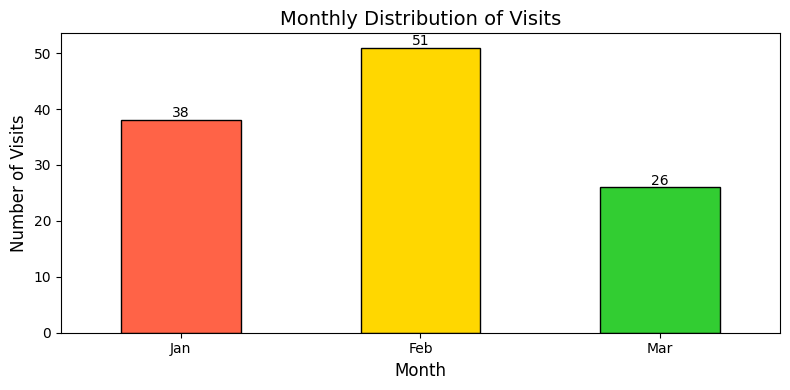

In [18]:
# Monthly Distribution of Visits

list_months = df_explore['month'].unique()
monthly_visits = df_explore['month'].value_counts()
monthly_visits = monthly_visits[list_months]
print("Monthly Visits Distribution:")
print(monthly_visits)


# List of bright colors for each bar
bright_colors = ['#FF6347', '#FFD700', '#32CD32', '#00BFFF', '#FF69B4', '#FF4500', '#8A2BE2', '#FF1493', '#FF8C00']

# Plotting the data with each bar in a bright color
plt.figure(figsize=(8, 4))
ax = monthly_visits.plot(kind='bar', color=bright_colors[:len(monthly_visits)], edgecolor='black')

# Adding values on top of each bar
for i, value in enumerate(monthly_visits):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=10)

# Adding titles and labels
plt.title('Monthly Distribution of Visits', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Visits', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##### <span style="color:DarkOrange">Number of Visits Per Sector</span> 

Most Common Sector: GENERAL CONSTRUCTION 

Number of Visits per Sector:
sector
GENERAL CONSTRUCTION    32
MANUFACTURING           26
ENERGY                  21
HOSPITALITY             17
HEALTHCARE               8
COMPLAINT                6
AGRICULTURE              4
PESTICIDES               1
Name: count, dtype: int64


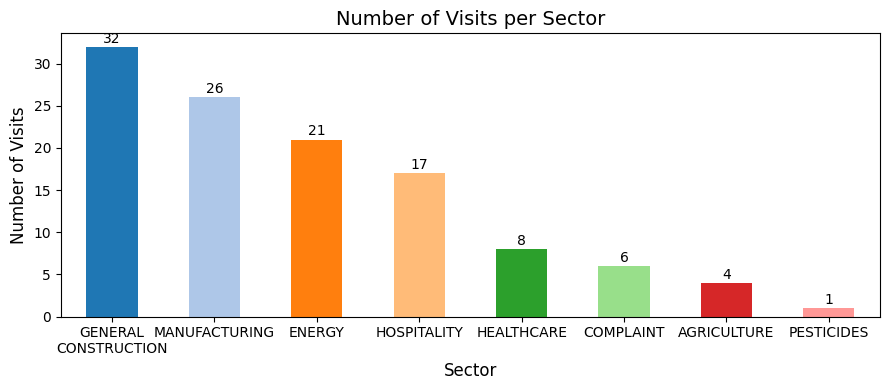

In [19]:
# Display the most common sector
most_common_sector = df_explore['sector'].value_counts().idxmax()
print(f"Most Common Sector: {most_common_sector} \n")

# Visits by Sector
sector_visits = df_explore['sector'].value_counts()
print("Number of Visits per Sector:")
print(sector_visits)

# Plotting with different colors for each bar
plt.figure(figsize=(9, 4))
ax = sector_visits.plot(kind='bar', color=plt.cm.tab20.colors)

# Adding values on top of each bar
for i, value in enumerate(sector_visits):
    ax.text(i, value + 0.5, str(value), ha='center', fontsize=10)

# Adding titles and labels
plt.title("Number of Visits per Sector", fontsize=14)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Number of Visits", fontsize=12)

# Wrapping long x-axis labels
plt.xticks(rotation=0, ha="center")
labels = [label.get_text().split(' ') for label in plt.gca().get_xticklabels()]
wrapped_labels = ['\n'.join(label) for label in labels]
plt.gca().set_xticklabels(wrapped_labels)

plt.tight_layout()
plt.show()


##### <span style="color:DarkOrange">Companies With Most Visits</span> 

Top Companies with the Most Visits:
company
POWER FUELS DISTRIBUTION COMPANY LIMITED    3
ATLANTIC BAY BEACH RESORT                   2
SEA2SEA FOUNDATION                          2
EMPRESS JULIE GUEST HOUSE                   2
FRONTIER OIL GHANA LIMITED                  2
Name: count, dtype: int64


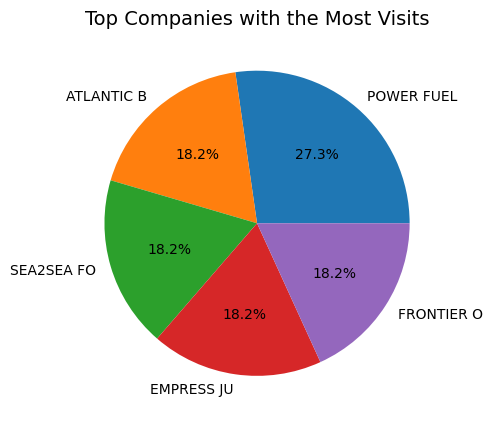

In [20]:
# Top Companies with the Most Visits

company_visits = df_explore['company'].value_counts()
print("Top Companies with the Most Visits:")
print(company_visits.head())

# Shortening the company names and plotting as a pie chart
top_companies = company_visits.head()

# Shorten the company names by taking the first 10 characters
shortened_companies = top_companies.index.str.slice(0, 10)

# Plotting the top companies with the most visits as a pie chart
plt.figure(figsize=(5, 5))
top_companies.plot(kind='pie', labels=shortened_companies, color=plt.cm.Paired.colors, autopct='%1.1f%%')
plt.title("Top Companies with the Most Visits", fontsize=14)
plt.ylabel("")  # Remove the default label
plt.tight_layout()
plt.show()



##### <span style="color:DarkOrange">Visits Assign to Activities</span> 

In [21]:
# Number of companies Screened
table_company_screen = df_explore.loc[df_explore['activity'] == 'SCREENING', ['company']]
list_company_screened = table_company_screen['company'].unique()
number_of_companies_screened = len(list_company_screened)

print(f'Number of companies screened : {number_of_companies_screened}')

Number of companies screened : 43


Activity Breakdown:
activity
SCREENING                  43
MONITORING                 41
VERIFICATION               25
COMPLAINT INVESTIGATION     6
Name: count, dtype: int64


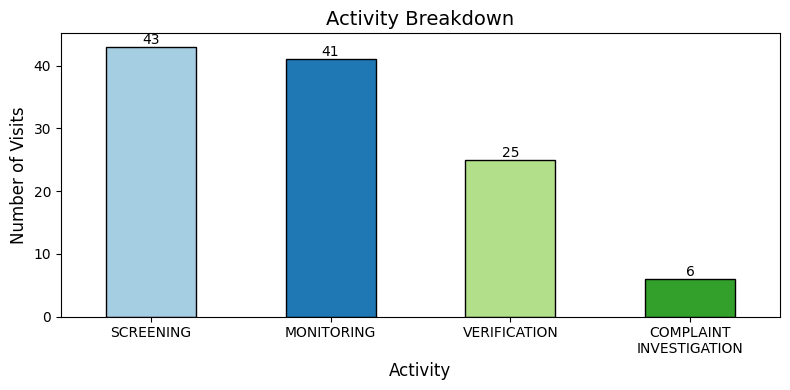

In [22]:
# Count how many visits were assigned to each activity.

activity_counts = df_explore['activity'].value_counts()
print("Activity Breakdown:")
print(activity_counts)

# Plotting the activity breakdown as a bar chart with wrapped x-axis labels
plt.figure(figsize=(8, 4))
ac = activity_counts.plot(kind='bar', color=plt.cm.Paired.colors, edgecolor='black')
plt.title("Activity Breakdown", fontsize=14)
plt.xlabel("Activity", fontsize=12)
plt.ylabel("Number of Visits", fontsize=12)

# Adding values on top of each bar
for i, value in enumerate(activity_counts):
    ac.text(i, value + 0.5, str(value), ha='center', fontsize=10)


# Wrapping long x-axis labels
plt.xticks(rotation=0, ha="center")
labels = [label.get_text().split(' ') for label in plt.gca().get_xticklabels()]
wrapped_labels = ['\n'.join(label) for label in labels]
plt.gca().set_xticklabels(wrapped_labels)

plt.tight_layout()
plt.show()


##### <span style="color:DarkOrange">Visit Base on Officer</span> 

Officer Visits Count:
FRED      24.0
HANNAH    36.0
IVY       57.0
KLENAM    72.0
MONTE     41.0
Name: count, dtype: float64


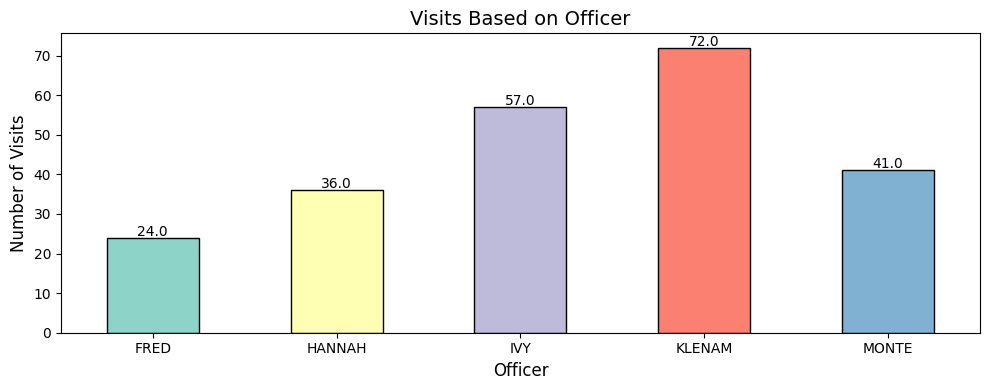

In [23]:
# Visits Based on Officer
# Count how many visits each officer (officer_1 and officer_2) handled.

officer_visits = df_explore['officer_1'].value_counts().add(df_explore['officer_2'].value_counts(), fill_value=0)
print("Officer Visits Count:")
print(officer_visits)


# Plotting the officer visits as a bar chart
plt.figure(figsize=(10, 4))
ax = officer_visits.plot(kind='bar', color=plt.cm.Set3.colors, edgecolor='black')
plt.title("Visits Based on Officer", fontsize=14)
plt.xlabel("Officer", fontsize=12)
plt.ylabel("Number of Visits", fontsize=12)

# Adding values on top of each bar
for i, value in enumerate(officer_visits):
    ax.text(i, value + 0.5, str(value), ha='center', fontsize=10)

# Wrapping long officer names if needed
plt.xticks(rotation=0, ha="center")
labels = [label.get_text().split(' ') for label in plt.gca().get_xticklabels()]
wrapped_labels = ['\n'.join(label) for label in labels]
plt.gca().set_xticklabels(wrapped_labels)

plt.tight_layout()
plt.show()



##### <span style="color:DarkOrange">Visit Base on Personnel</span>

Personnel Visits Count:
personnel
NELSON    42
EUNICE    35
HANNAH    17
IVY       11
MONTE      5
FRED       5
Name: count, dtype: int64


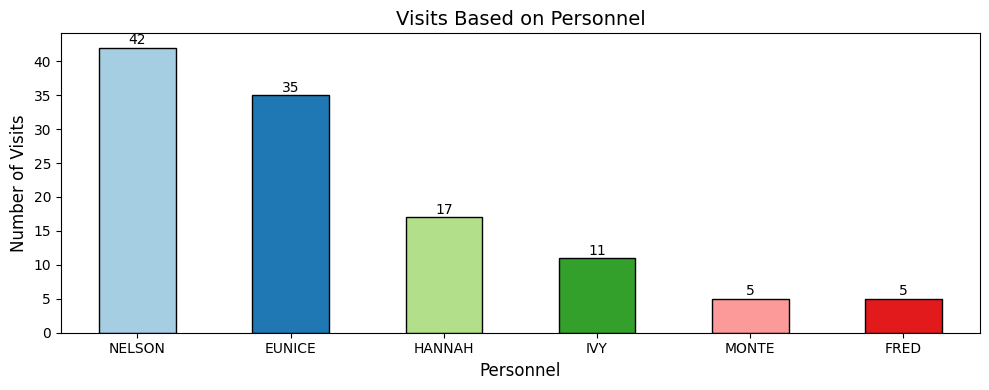

In [24]:
# Visits Based on Personnel
# Count how many visits each Personnel handled.

personnel_visits = df_explore['personnel'].value_counts()

print("Personnel Visits Count:")
print(personnel_visits)


# Plot

# Plotting the personnel visits as a bar chart
plt.figure(figsize=(10, 4))
ax = personnel_visits.plot(kind='bar', color=plt.cm.Paired.colors, edgecolor='black')
plt.title("Visits Based on Personnel", fontsize=14)
plt.xlabel("Personnel", fontsize=12)
plt.ylabel("Number of Visits", fontsize=12)

# Adding values on top of each bar
for i, value in enumerate(personnel_visits):
    ax.text(i, value + 0.5, str(value), ha='center', fontsize=10)

# Wrapping long personnel names if needed
plt.xticks(rotation=0, ha="center")
labels = [label.get_text().split(' ') for label in plt.gca().get_xticklabels()]
wrapped_labels = ['\n'.join(label) for label in labels]
plt.gca().set_xticklabels(wrapped_labels)

plt.tight_layout()
plt.show()




##### <span style="color:DarkOrange">Visits By Driver</span> 

Driver Visits Count:
driver
PATRICK    81
ASARE      28
ALBERT      6
Name: count, dtype: int64


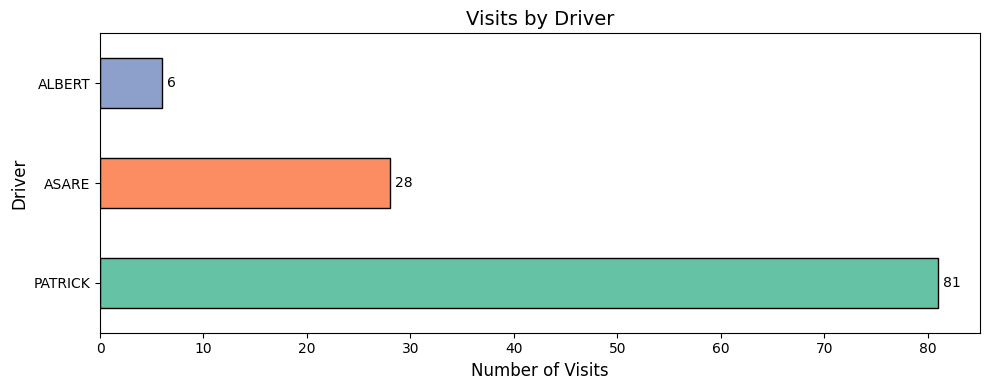

In [25]:
# Visits by Driver
# Count how many visits each driver is assigned to.

driver_visits = df_explore['driver'].value_counts()
print("Driver Visits Count:")
print(driver_visits)


# Plotting visits by driver as a horizontal bar chart
plt.figure(figsize=(10, 4))
ax = driver_visits.plot(kind='barh', color=plt.cm.Set2.colors, edgecolor='black')
plt.title("Visits by Driver", fontsize=14)
plt.xlabel("Number of Visits", fontsize=12)
plt.ylabel("Driver", fontsize=12)

# Adding values to the right of each bar
for i, value in enumerate(driver_visits):
    ax.text(value + 0.5, i, str(value), va='center', fontsize=10)

# Adjust layout for clarity
plt.tight_layout()
plt.show()



#### <span style="color:DarkOrange">Other Factors</span> 

##### <span style="color:DarkOrange">Pending Status Count by Sectior</span> 

Sector with the Most Pending Status: GENERAL CONSTRUCTION (18 pending statuses) 
 
sector
GENERAL CONSTRUCTION    18
MANUFACTURING            9
ENERGY                   9
HOSPITALITY              6
AGRICULTURE              2
COMPLAINT                2
PESTICIDES               1
HEALTHCARE               1
Name: count, dtype: int64


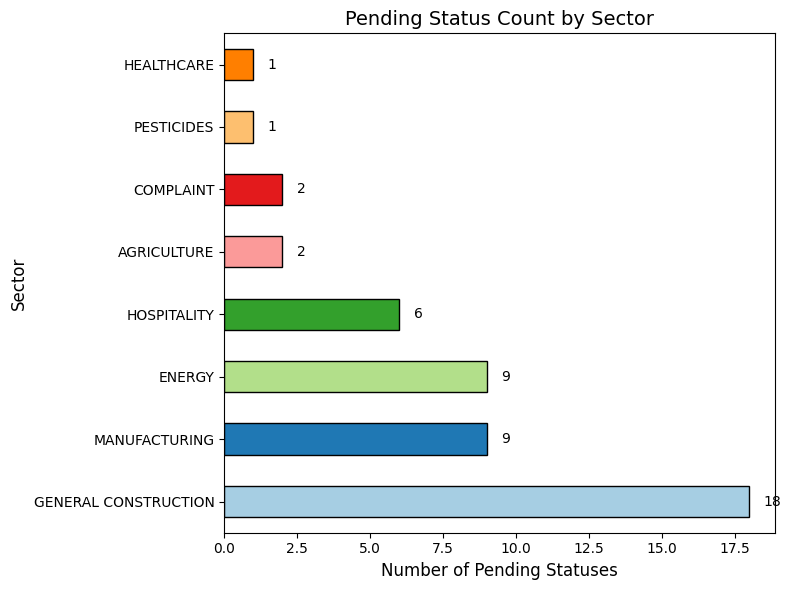

In [26]:
# Sector with most pending status

# Filter rows with 'pending' in the status column (case-insensitive)
pending_status = df_explore[df_explore['status'].str.contains('pending', case=False, na=False)]

# Group by sector and count the number of pending statuses in each sector
sector_pending_counts = pending_status['sector'].value_counts()

# Get the sector with the most pending statuses
most_pending_sector = sector_pending_counts.idxmax()
most_pending_count = sector_pending_counts.max()

print(f"Sector with the Most Pending Status: {most_pending_sector} ({most_pending_count} pending statuses) \n ")
print(sector_pending_counts)


# Plotting the sector with most pending statuses as a horizontal bar chart
plt.figure(figsize=(8, 6))
ax = sector_pending_counts.plot(kind='barh', color=plt.cm.Paired.colors, edgecolor='black')
plt.title("Pending Status Count by Sector", fontsize=14)
plt.xlabel("Number of Pending Statuses", fontsize=12)
plt.ylabel("Sector", fontsize=12)

# Adding values to the right of each bar
for i, value in enumerate(sector_pending_counts):
    ax.text(value + 0.5, i, str(value), va='center', fontsize=10)

# Adjust layout for clarity
plt.tight_layout()
plt.show()



##### <span style="color:DarkOrange">Pending Activities by Status</span> 

Pending Status Distribution:
status
PAYMENT RECEIPT PENDING           37
ADDITIONAL INFORMATION PENDING     4
ZONING & PAYMENT PENDING           2
MEETING PENDING                    2
SCOPING REPORT PENDING             1
NO OBJECTION & PAYMENT PENDING     1
ZONING, WMP & PAYMENT PENDING      1
Name: count, dtype: int64


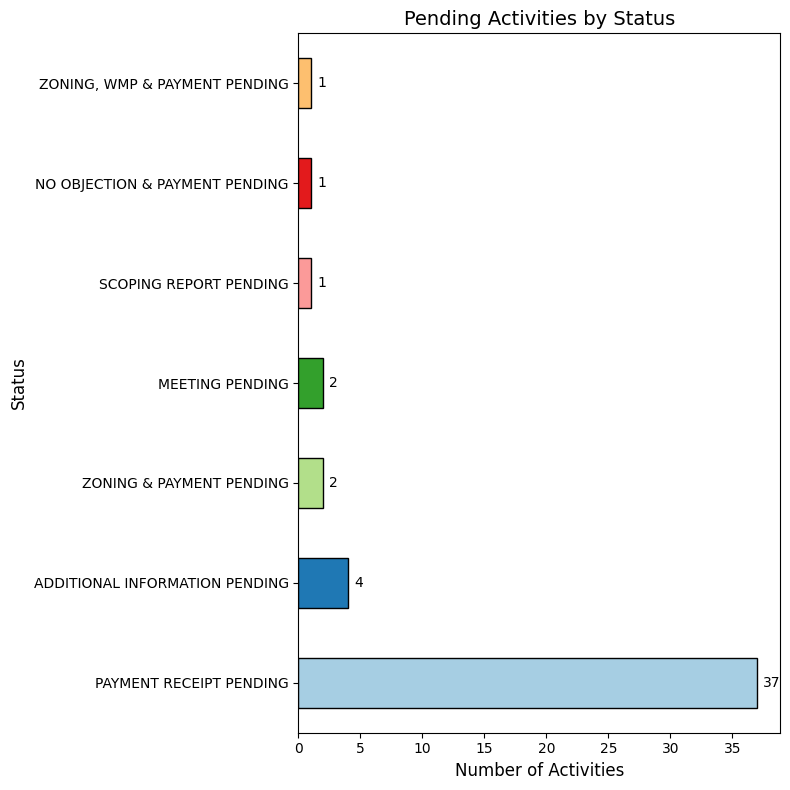

In [27]:
# Status with the Most Pending Activities
# Find which status is most associated with pending activities.

pending_status = df_explore[df_explore['status'].str.contains('PENDING', na=False)]['status'].value_counts()
print("Pending Status Distribution:")
print(pending_status)

# Plotting the status with the most pending activities
plt.figure(figsize=(8, 8))
ax = pending_status.plot(kind='barh', color=plt.cm.Paired.colors, edgecolor='black')
plt.title("Pending Activities by Status", fontsize=14)
plt.xlabel("Number of Activities", fontsize=12)
plt.ylabel("Status", fontsize=12)

# Adding values to the right of each bar
for i, value in enumerate(pending_status):
    ax.text(value + 0.5, i, str(value), va='center', fontsize=10)

# Adjust layout for clarity
plt.tight_layout()
plt.show()



##### <span style="color:DarkOrange">Visit by Location</span> 

Visits by Location:
location
PRAMPRAM            24
DAWHENYA            16
SHAI HILLS          12
DODOWA               7
AYIKUMA              6
MATAHEKO-AFIENYA     6
TSOPOLI              5
DORYUMU              4
AFIENYA              4
TEYE KWAME           4
MANYA-JORPANYA       3
MOBOLE               3
NEW NINGO            3
APESE                2
AMRAHIA              2
MIOTSO               2
APINYA               2
ASUTSUARE            2
SOTA                 1
DAWA                 1
OLD NINGO            1
ADUMANYA             1
KASUNYA              1
SAASABI              1
BULAASO              1
AYENYA               1
Name: count, dtype: int64


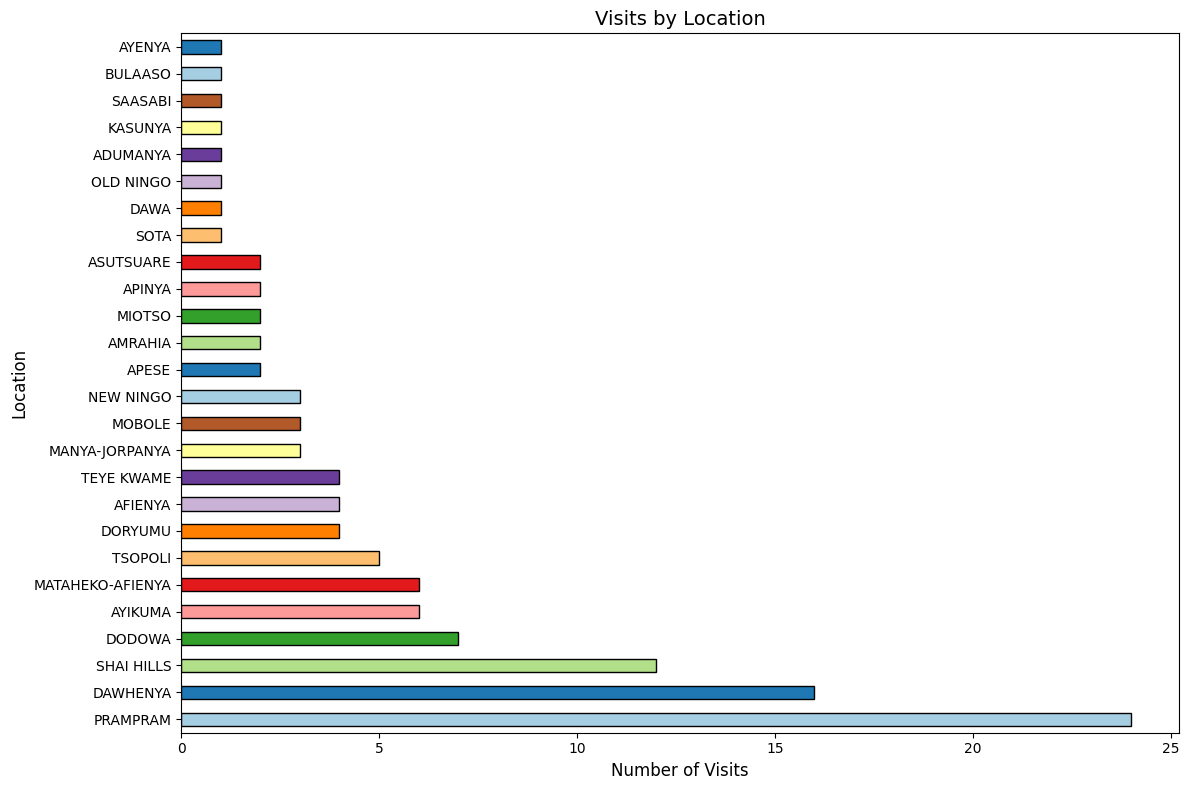

In [28]:
# Location-Based Analysis
# Analyze the visits based on the location, latitude, and longitude

location_visits = df_explore['location'].value_counts()
print("Visits by Location:")
print(location_visits)

# Plotting Visits by Location
plt.figure(figsize=(12, 8))
location_visits.plot(kind='barh', color=plt.cm.Paired.colors, edgecolor='black')

plt.title("Visits by Location", fontsize=14)
plt.xlabel("Number of Visits", fontsize=12)
plt.ylabel("Location", fontsize=12)

plt.tight_layout()
plt.show()


### <span style="color:DarkOrange">Payment Summary</span> 

##### <span style="color:DarkOrange">Payment Values</span> 

In [29]:
# Average Fee per Sector : Find the average processing_fee, permit_fee, and total_fee per sector.

df_explore['processing_fee'] = pd.to_numeric(df_explore['processing_fee'], errors='coerce')
df_explore['permit_fee'] = pd.to_numeric(df_explore['permit_fee'], errors='coerce')
df_explore['total_fee'] = pd.to_numeric(df_explore['total_fee'], errors='coerce')

In [30]:
total_processing_fee = df_explore['processing_fee'].sum().round(2)
total_permit_fee = df_explore['permit_fee'].sum().round(2)


print(f'Total Processing fee : {total_processing_fee}')
print(f'Total Permit Fee : {total_permit_fee}')

Total Processing fee : 89684.86
Total Permit Fee : 132628.42


In [31]:
# Number of pending payment
table_pending_payment = df_explore.loc[df_explore['status'].str.contains('PENDING', case=False, na=False), ['total_fee', 'payment_status']].groupby('payment_status')

table_pending_payment_sum = table_pending_payment.sum()
table_pending_payment_count = table_pending_payment.count()


print(f'Sum of Pending payment : {table_pending_payment_sum} \n ________ \n')
print(f'Count of Pending payment : {table_pending_payment_count}')


Sum of Pending payment :                 total_fee
payment_status           
PAID               5335.0
UNPAID            67236.5 
 ________ 

Count of Pending payment :                 total_fee
payment_status           
PAID                    2
UNPAID                 37


##### <span style="color:DarkOrange">Average Fee per Sector</span> 

Average Fees per Sector:
                      processing_fee  permit_fee
sector                                          
AGRICULTURE                  1155.00         NaN
COMPLAINT                        NaN         NaN
ENERGY                       1310.40     1434.00
GENERAL CONSTRUCTION         1671.73     2438.33
HEALTHCARE                    552.50     1700.00
HOSPITALITY                   401.25      795.00
MANUFACTURING                3958.75    10774.64
PESTICIDES                       NaN     1000.00


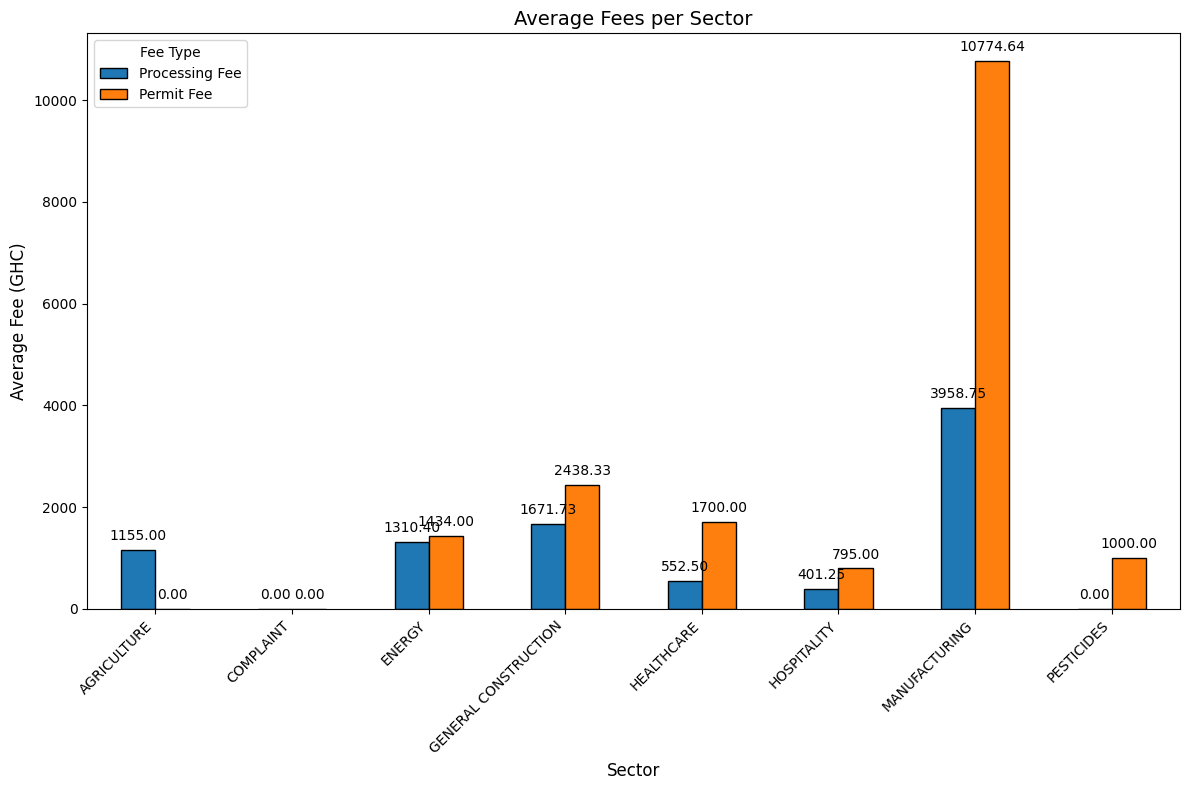

In [32]:


# Group by sector and calculate the average
avg_fees_per_sector = df_explore.groupby('sector')[['processing_fee', 'permit_fee']].mean()

# Round the results to 2 decimal places
avg_fees_per_sector = avg_fees_per_sector.round(2)

print("Average Fees per Sector:")
print(avg_fees_per_sector)

# Plotting Average Fees per Sector
ax = avg_fees_per_sector.plot(
    kind='bar',
    figsize=(12, 8),
    color=['#1f77b4', '#ff7f0e'],
    edgecolor='black'
)

# Adding values on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',  # Show value with 2 decimals
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Positioning on top of the bar
        xytext=(0, 5),  # Vertical offset for the label
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Average Fees per Sector", fontsize=14)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Average Fee (GHC)", fontsize=12)
plt.legend(title="Fee Type", labels=['Processing Fee', 'Permit Fee'], fontsize=10)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()




##### <span style="color:DarkOrange">Payment per Visit</span> 

Payment Status Distribution:
payment_status
UNPAID        41
PAID          25
PROCESSING     2
Name: count, dtype: int64


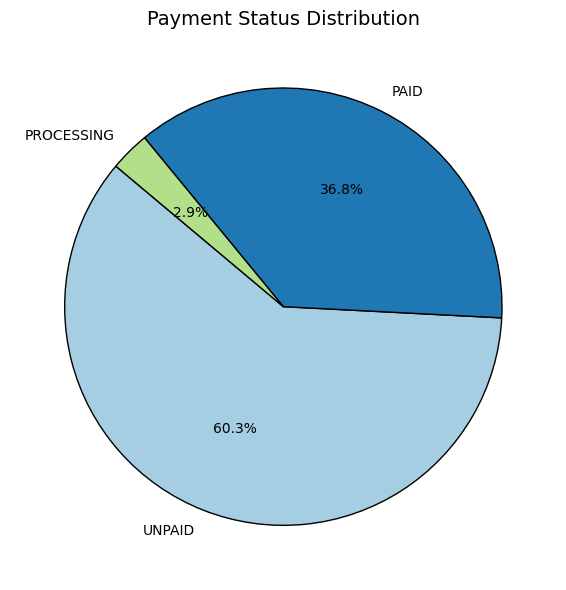

In [33]:
# Payment Status Distribution : Get a count of how many visits had each payment status.

payment_status_counts = df_explore['payment_status'].value_counts()
print("Payment Status Distribution:")
print(payment_status_counts)

# Plotting Payment Status Distribution
plt.figure(figsize=(6,6))
payment_status_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Payment Status Distribution", fontsize=14)
plt.ylabel("")  # Remove the y-axis label
plt.tight_layout()
plt.show()


##### <span style="color:DarkOrange">Company with the highest Payment</span> 

<Figure size 1200x800 with 0 Axes>

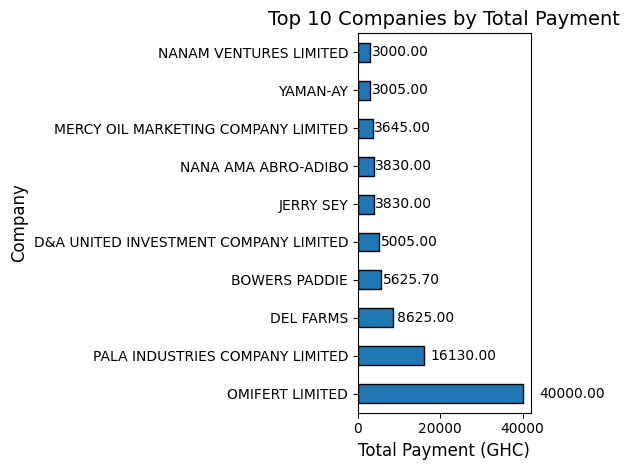

In [43]:
table_company_highest_payment = df_explore.loc[df_explore['payment_status'] == 'PAID', ['company', 'total_fee']].groupby('company').sum().sort_values(by='total_fee',ascending=False)

# Plotting the companies with the highest total payment as a horizontal bar chart
plt.figure(figsize=(12, 8))
ax = table_company_highest_payment.head(10).plot(
    kind='barh',
    color='#1f77b4',
    edgecolor='black',
    legend=False
)

# Adding titles and labels
plt.title("Top 10 Companies by Total Payment", fontsize=14)
plt.xlabel("Total Payment (GHC)", fontsize=12)
plt.ylabel("Company", fontsize=12)

# Adding values at the end of each bar
for i, value in enumerate(table_company_highest_payment.head(10)['total_fee']):
    ax.text(value + value * 0.1, i, f'{value:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

